#   Red Wine Quality Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.metrics import precision_score,recall_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Read Data

In [4]:
data =pd.read_csv('Downloads/winequality-red.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# checking numbers of unique value in each columns
uni = []
for col in data.columns:
    uni.append(len(np.unique(data[col])))

In [8]:
pd.DataFrame({"columns":data.columns,
             "Unique":uni})

,columns,Unique
0,fixed acidity,96
1,volatile acidity,143
2,citric acid,80
3,residual sugar,91
4,chlorides,153
5,free sulfur dioxide,60
6,total sulfur dioxide,144
7,density,436
8,pH,89
9,sulphates,96


##### Visualizing terget variable

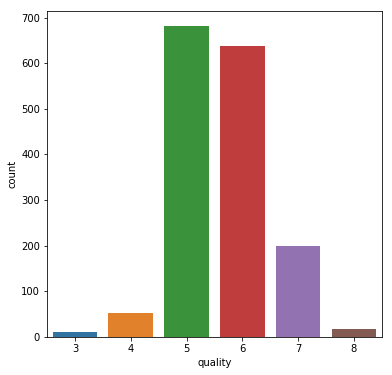

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x='quality',data=data,)

In [10]:
np.unique(data['quality'])

array([3, 4, 5, 6, 7, 8])

###### changing target varable into 'good' & 'bad' category

In [11]:
Quality = []
for q in data['quality']:
    if q <6.5:
        Quality.append(0)
    else:
        Quality.append(1)
        

In [12]:
data["Quality"]=Quality
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [13]:
# target variable tradeoff
data['Quality'].value_counts()

0    1382
1     217
Name: Quality, dtype: int64

In [14]:
data = data.drop(columns=['quality'])

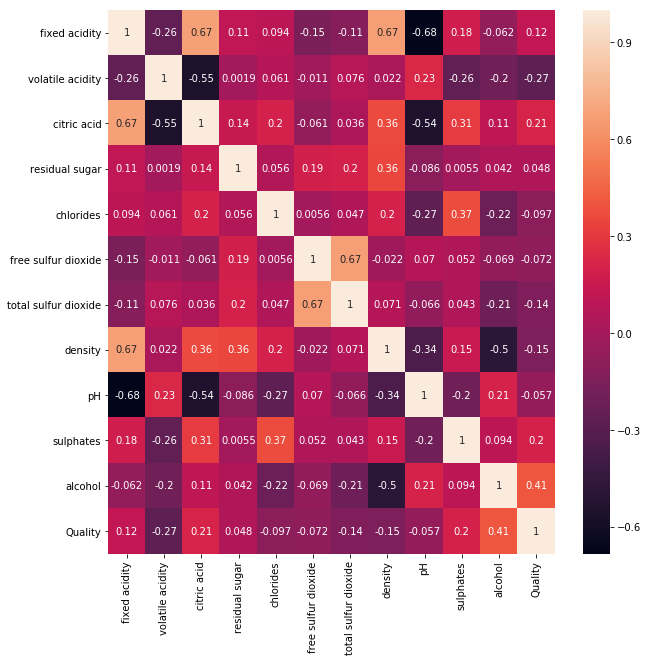

In [15]:
wine_corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(wine_corr,annot=True)

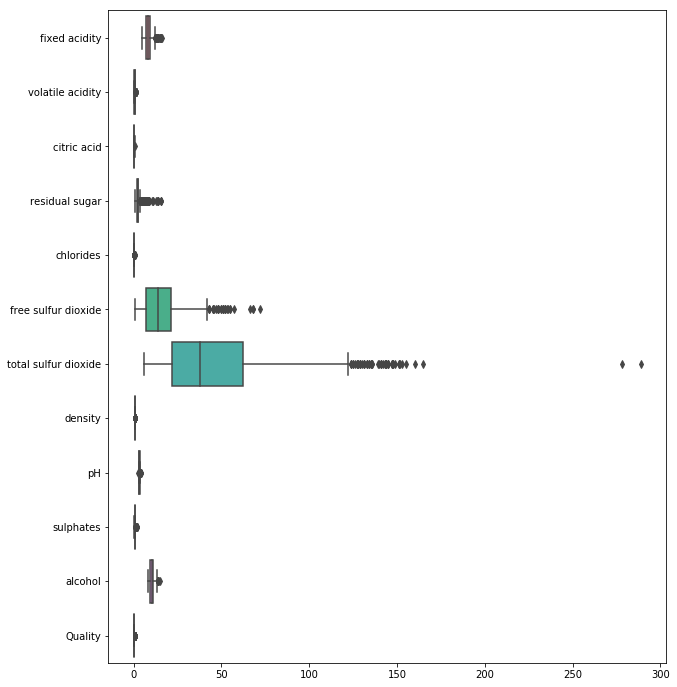

In [16]:
plt.figure(figsize=(10,12))
sns.boxplot(data = data,orient='h')

This plot here provide a clear intution about the data in different scales 

#### Independent variable (X) & Target variable (y)

In [17]:
X = data.iloc[:,:-1].values
print(X.shape)
y = data.iloc[:,-1].values
y = y.reshape(-1, 1)
print(y.shape)

(1599, 11)
(1599, 1)


##### genareting test and train data

In [18]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.33, random_state=38,stratify=y)

### Logistic Regression 

In [19]:
# function to find best value of Random_state
def someNum(num):
    xtrain,xtest,ytrain,ytest= train_test_split(X,y,test_size=.33,random_state=num)
    logisticRegression = LogisticRegression()
    logisticRegression.fit(xtrain,ytrain)
    predicted  = logisticRegression.predict(xtest)
    f1score = f1_score(ytest,predicted)
    recallscore = recall_score(ytest,predicted)
    precisionscore = precision_score(ytest, predicted)
    acc_score = accuracy_score(ytest, predicted)
    return f1score,recallscore,precisionscore,acc_score

In [20]:
f1_score_=[]
recall_score_=[]
precision_score_=[]
acc_score_ =[]
for a in range(0,50):
    f1score,recallscore,precisionscore,acc_score = someNum(a)
    f1_score_.append(f1score)
    recall_score_.append(recallscore)
    precision_score_.append(precisionscore)
    acc_score_.append(acc_score)

In [21]:
f1_score_.index(max(f1_score_))

2

In [22]:
# custom plot function
def listPlot(lis,n):
    plt.figure()
    plt.plot([x * 100 for x in lis])
    plt.xlabel('N value')
    plt.ylabel('(%)')
    plt.title("X = {} Y = {}".format([x for x in range(n)][np.argmax(lis)], (max(lis)*100)))
    plt.axhline(y=(max(lis)*100),color = 'r', linestyle = '--')
    plt.axvline(x=[x for x in range(n)][np.argmax(lis)],color = 'g', linestyle = '--')
    plt.show()

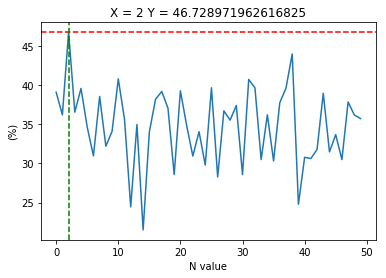

In [23]:
listPlot(f1_score_,50)

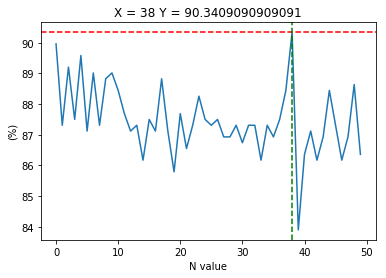

In [24]:
listPlot(acc_score_,50)

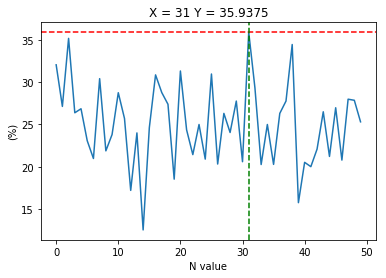

In [25]:
listPlot(recall_score_,50)

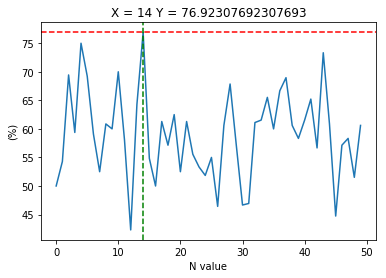

In [26]:
listPlot(precision_score_,50)

In [27]:
len(precision_score_)

50

In [28]:
trend = pd.DataFrame({
    'random_state':range(0,50),
    'f1_score_':f1_score_,
    'recall_score_':recall_score_,
    'precision_score_':precision_score_,
    'acc_score_':acc_score_
})
trend.head()


,random_state,f1_score_,recall_score_,precision_score_,acc_score_
0,0,0.390805,0.320755,0.500000,0.899621
1,1,0.361905,0.271429,0.542857,0.873106
2,2,0.467290,0.352113,0.694444,0.892045
3,3,0.365385,0.263889,0.593750,0.875000
4,4,0.395604,0.268657,0.750000,0.895833


### Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [30]:
stdSclar = StandardScaler()
X_train_stdScaled = stdSclar.fit_transform(X_train)

In [31]:
X_test_stdScaled = stdSclar.fit_transform(X_test)

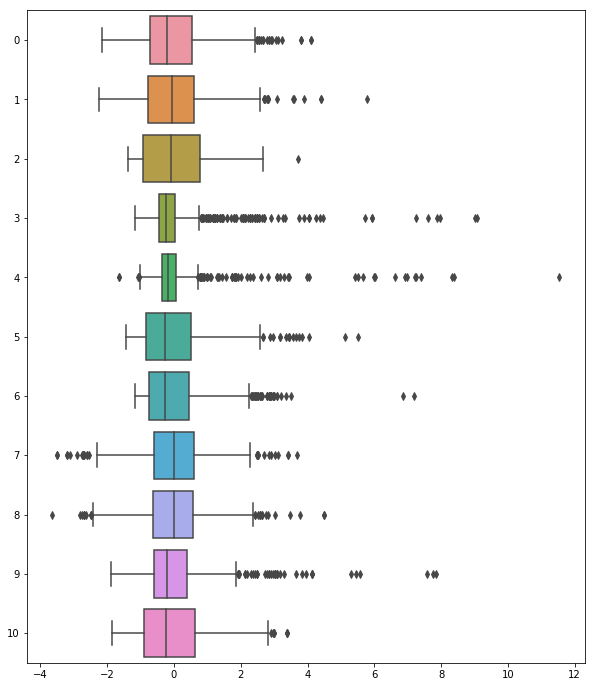

In [32]:
# scaling features using STANDERDSCALER
plt.figure(figsize=(10,12))
sns.boxplot(data = X_train_stdScaled,orient='h')

### Logistic Regression after Scaling

In [33]:
lr = LogisticRegression()
lr.fit(X_train_stdScaled, y_train)
lr_predict = lr.predict(X_test_stdScaled)

In [34]:
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[438  18]
 [ 48  24]]
87.5


In [35]:
 log_reg = cross_val_score(estimator = lr, X = X_train_stdScaled, y = y_train, cv = 50)
log_reg.mean()

0.8722727272727273

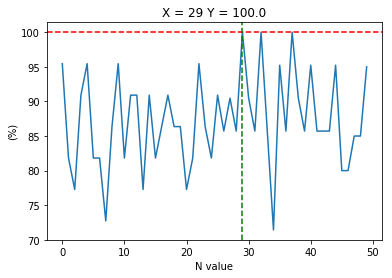

In [36]:
listPlot(list(log_reg),50)

### Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=3,max_depth=2)
dt.fit(X_train_stdScaled,y_train)
dt_predict = dt.predict(X_test_stdScaled)
dt.score(X_train_stdScaled,y_train)

0.8842203548085901

In [38]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[433  23]
 [ 44  28]]
87.31060606060606


In [39]:
dt.predict_log_proba(X_test_stdScaled)

array([[-0.90715825, -0.51696061],
       [-0.04204009, -3.19007802],
       [-0.04204009, -3.19007802],
       ...,
       [-0.04204009, -3.19007802],
       [-0.04204009, -3.19007802],
       [-0.04204009, -3.19007802]])

In [40]:
predY = dt.predict_log_proba(X_test_stdScaled)[:,1]

In [41]:
new_predY = []
for i in range(len(predY)):
    if predY[i]<0.454:
        new_predY.append(0)
    else:
        new_predY.append(1)

In [42]:
accuracy_score(y_test,new_predY)

0.8636363636363636

In [43]:

def maxDepthDT(depth):
    dt = DecisionTreeClassifier(max_depth=depth,random_state=3)
    dt.fit(X_train_stdScaled,y_train)
    dt_predict = dt.predict(X_test_stdScaled)
    return (dt.score(X_train_stdScaled,y_train)),dt.score(X_test_stdScaled,y_test)
    

In [44]:
train_acc = []
validate_acc = []
for i in range(1,16):
    train_a,val_a = maxDepthDT(i)
    train_acc.append(train_a)
    validate_acc.append(val_a)

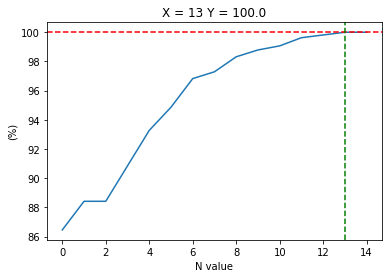

In [45]:
listPlot(train_acc,15)

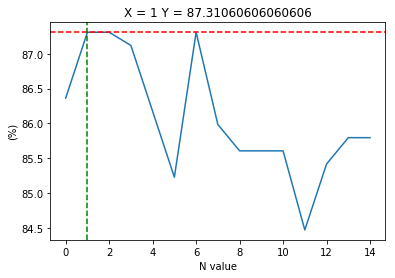

In [46]:
listPlot(validate_acc,15)

In [47]:
trade = pd.DataFrame({
    'max depth':range(1,16),
    'training acc':train_acc,
    'validation acc':validate_acc
})
trade

,max depth,training acc,validation acc
0,1,0.864613,0.863636
1,2,0.884220,0.873106
2,3,0.884220,0.873106
3,4,0.908497,0.871212
4,5,0.932773,0.861742
5,6,0.948646,0.852273
6,7,0.968254,0.873106
7,8,0.972923,0.859848
8,9,0.983193,0.856061
9,10,0.987862,0.856061


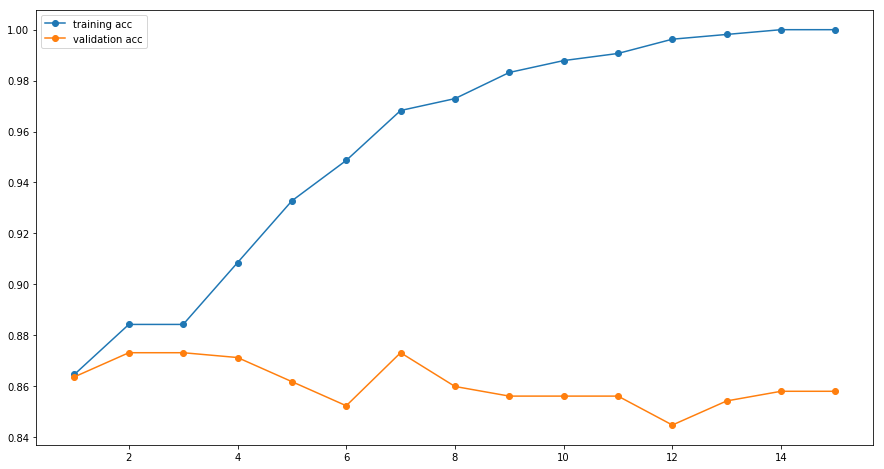

In [48]:
plt.figure(figsize=(15,8))
plt.plot(trade['max depth'],trade['training acc'],marker='o')
plt.plot(trade['max depth'],trade['validation acc'],marker='o')
plt.legend()

### Naive Bayes - GaussianNB

In [49]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_stdScaled,y_train)
nb_predict=nb.predict(X_test_stdScaled)

In [50]:
#print confusion matrix and accuracy score
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)
print(nb_acc_score*100)

[[392  64]
 [ 24  48]]
83.33333333333334


### Ensemble Method - Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=34)
rf.fit(X_train_stdScaled, y_train)
rf_predict=rf.predict(X_test_stdScaled)

In [52]:
#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[439  17]
 [ 41  31]]
89.01515151515152


In [53]:
pd.Series(rf.feature_importances_,index=data.columns[:-1])

fixed acidity           0.092310
volatile acidity        0.153106
citric acid             0.061484
residual sugar          0.076513
chlorides               0.062897
free sulfur dioxide     0.059622
total sulfur dioxide    0.073379
density                 0.109559
pH                      0.059085
sulphates               0.133877
alcohol                 0.118167
dtype: float64

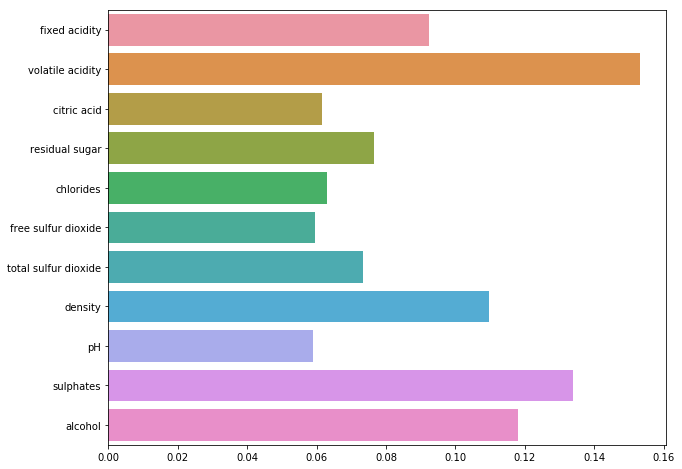

In [54]:
plt.figure(figsize=(10,8))
sns.barplot(x =rf.feature_importances_,y=data.columns[:-1])

### Support Vector Classification

In [55]:
from sklearn.svm import SVC
#we shall use the rbf kernel first and check the accuracy
lin_svc = SVC(kernel='linear')
lin_svc.fit(X_train_stdScaled, y_train)
lin_svc=rf.predict(X_test_stdScaled)

In [56]:
#print confusion matrix and accuracy score
lin_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
lin_svc_acc_score = accuracy_score(y_test, rf_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score*100)


[[439  17]
 [ 41  31]]
89.01515151515152


In [57]:
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train_stdScaled, y_train)
rbf_svc=rf.predict(X_test_stdScaled)

In [58]:
rbf_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
rbf_svc_acc_score = accuracy_score(y_test, rf_predict)
print(rbf_svc_conf_matrix)
print(rbf_svc_acc_score*100)


[[439  17]
 [ 41  31]]
89.01515151515152


###  Ensemble Method - Gradient Boosting Classifier

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
def randState(n):
    gbc = GradientBoostingClassifier(random_state=34,n_estimators=n*10)
    gbc.fit(X_train_stdScaled,y_train)
    gbc_predict = gbc.predict(X_test_stdScaled)
    return (gbc.score(X_train_stdScaled,y_train)),gbc.score(X_test_stdScaled,y_test)

In [61]:
train_ac = []
validate_ac = []
for i in range(1,51):
    train_a,val_a = randState(i)
    train_ac.append(train_a)
    validate_ac.append(val_a)

In [62]:
trade_n = pd.DataFrame({
    'n_estimator':[x*10 for x in range(1,51)],
    'training acc':train_ac,
    'validation acc':validate_ac
})
trade_n.head()

,n_estimator,training acc,validation acc
0,10,0.887955,0.869318
1,20,0.916900,0.882576
2,30,0.929038,0.880682
3,40,0.936508,0.882576
4,50,0.941176,0.884470


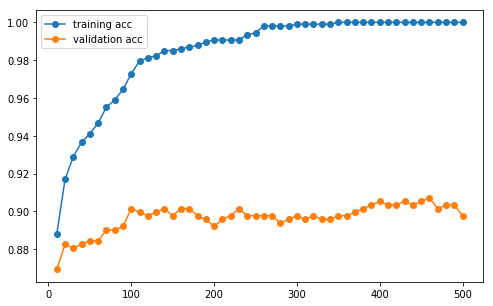

In [63]:
plt.figure(figsize=(8,5))
plt.plot(trade_n['n_estimator'],trade_n['training acc'],marker='o')
plt.plot(trade_n['n_estimator'],trade_n['validation acc'],marker='o')
plt.legend()

In [64]:
gbc = GradientBoostingClassifier(random_state=34,n_estimators=460)
gbc.fit(X_train_stdScaled,y_train)
gbc.score(X_train_stdScaled,y_train),gbc.score(X_test_stdScaled,y_test)

(1.0, 0.9071969696969697)

### XG Boost Classifier

In [65]:
from xgboost import XGBClassifier

In [66]:
xgbc = XGBClassifier(random_state=34,colsample_bytree=0.7,max_depth=4)
xgbc.fit(X_train_stdScaled,y_train)
xgbc.score(X_train_stdScaled,y_train),xgbc.score(X_test_stdScaled,y_test)

(0.9803921568627451, 0.9015151515151515)

### Ensemble Method - Ada Boost Classifier

In [67]:
from sklearn.ensemble import AdaBoostClassifier

In [68]:
abc = AdaBoostClassifier(random_state=34,base_estimator=RandomForestClassifier(random_state=34),n_estimators=100,learning_rate=0.01)
abc.fit(X_train_stdScaled,y_train)
abc.score(X_train_stdScaled,y_train),abc.score(X_test_stdScaled,y_test)

(1.0, 0.8958333333333334)

### Stacking